In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import pi
import math

# importing Qiskit
import qiskit
from qiskit import IBMQ, Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

from qiskit.providers.aer.noise import NoiseModel

# import basic plot tools

from qiskit.tools.visualization import plot_histogram, plot_circuit_layout

from qiskit.providers.ibmq import least_busy


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Replace TOKEN with your string
IBMQ.save_account('717cf61727cdb38042395c8140ffda877eedc5a316b84196c709e29869a6620ef09f9872200dc64ec870c7e5051229c976715491941396be89791d1a0ba5a803',overwrite=True)

# In subsequent sessios the Token can be loaded from disk
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Plot results
def show_results(D):
    # D is a dictionary with classical bits as keys and count as value
    # example: D = {'000': 497, '001': 527}
    
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()
    #print(D)
    zero = 0
    one = 0
    for r in D:
        if(r[1]=='0'):
            zero += D[r]
        else: 
            one += D[r]
    print("Zero" + str(zero/8192))
    print("One" + str(one/8192))

# Execute circuit, display a histogram of the results
def execute_locally(qc, draw_circuit=False):
    # Compile and run the Quantum circuit on a simulator backend
    backend_sim = Aer.get_backend('qasm_simulator')
    job_sim = execute(qc, backend_sim,shots=8192)
    result_sim = job_sim.result()
    result_counts = result_sim.get_counts(qc)
    
    # Print the results
    print("simulation: \n\n", result_counts)
    show_results(result_counts)

In [4]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
physical_devices = provider.backends(simulator=False, operational=True)
for backend in physical_devices:
    print(backend.status())

BackendStatus(backend_name='ibmqx2', backend_version='2.0.5', operational=True, pending_jobs=4, status_msg='active')
BackendStatus(backend_name='ibmq_16_melbourne', backend_version='2.1.0', operational=True, pending_jobs=7, status_msg='active')
BackendStatus(backend_name='ibmq_london', backend_version='1.1.0', operational=True, pending_jobs=3, status_msg='active')
BackendStatus(backend_name='ibmq_burlington', backend_version='1.1.4', operational=True, pending_jobs=4, status_msg='active')
BackendStatus(backend_name='ibmq_essex', backend_version='1.0.1', operational=True, pending_jobs=5, status_msg='active')
BackendStatus(backend_name='ibmq_rome', backend_version='1.0.0', operational=True, pending_jobs=6, status_msg='active')


In [6]:
backend = least_busy(physical_devices)
print (backend);

ibmqx2


In [7]:
real_device = backend

In [8]:
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map

In [9]:
noise_model = NoiseModel.from_backend(properties)

In [10]:
#recebe circuito e registo com 3 qubits para por no estado ghz
def ghz(qc,qr,cr):
    qc.h(qr[0])
    qc.t(qr[0])
    qc.h(qr[0])
    qc.s(qr[0])
    #qc.x(qr[0])
    qc.h(qr[1])
    qc.cx(qr[1],qr[2])
    qc.cx(qr[2],qr[3])
    qc.cx(qr[0],qr[1])
    qc.h(qr[0])
    qc.measure(qr[0],cr[0])
    qc.measure(qr[1],cr[1])
    qc.cx(qr[1],qr[2])
    qc.cz(qr[0],qr[2])
    qc.barrier()
    qc.h(qr[3])
    qc.measure(qr[3],cr[3])
    qc.cz(qr[3],qr[2])
    qc.measure(qr[2],cr[2])
    
   

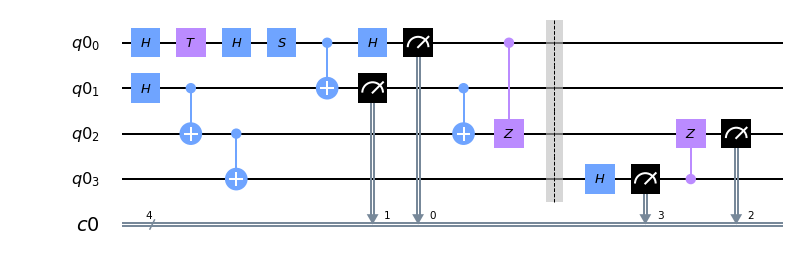

In [11]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)
ghz(qc,qr,cr)
qc.draw(output='mpl')

simulation: 

 {'1111': 142, '0111': 162, '1101': 149, '0001': 852, '1010': 870, '1110': 151, '0010': 867, '0110': 145, '0011': 880, '0100': 148, '0101': 141, '1000': 869, '1011': 914, '1100': 160, '0000': 834, '1001': 908}


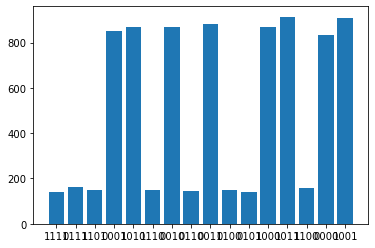

Zero0.853759765625
One0.146240234375


In [12]:
execute_locally(qc)

In [28]:
job = execute(qc,backend, shots=8192)
job.result().get_counts()
job.error_message() 

In [15]:
def ghz2(qc,qr,cr):
    qc.h(qr[0])
    qc.t(qr[0])
    qc.h(qr[0])
    qc.s(qr[0])
    #qc.x(qr[0])
    qc.h(qr[1])
    qc.cx(qr[1],qr[2])
    qc.cx(qr[1],qr[3])
    qc.barrier()
    qc.cx(qr[0],qr[1])
    qc.h(qr[0])
    qc.cx(qr[1],qr[2])
    qc.cz(qr[0],qr[2])
    qc.measure(qr[2],cr[2])
    #qc.barrier()
    #qc.h(qr[3])
    #qc.measure(qr[3],cr[3])
    #qc.cz(qr[3],qr[2])
    #qc.measure(qr[2],cr[2])

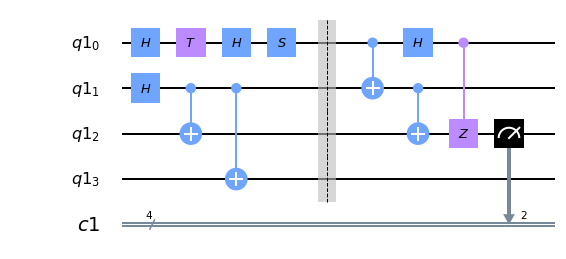

In [16]:
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
qc = QuantumCircuit(qr,cr)
ghz2(qc,qr,cr)
qc.draw(output='mpl')



simulation: 

 {'0000': 7002, '0100': 1190}


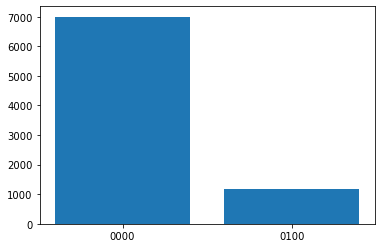

Zero0.854736328125
One0.145263671875


In [17]:
execute_locally(qc)

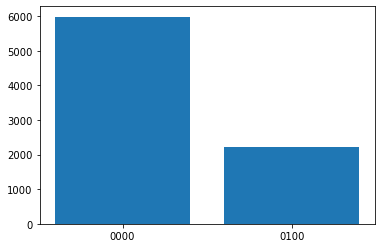

Zero0.73046875
One0.26953125


In [18]:
job = execute(qc,backend, shots=8192)
D = job.result().get_counts()
show_results(D)

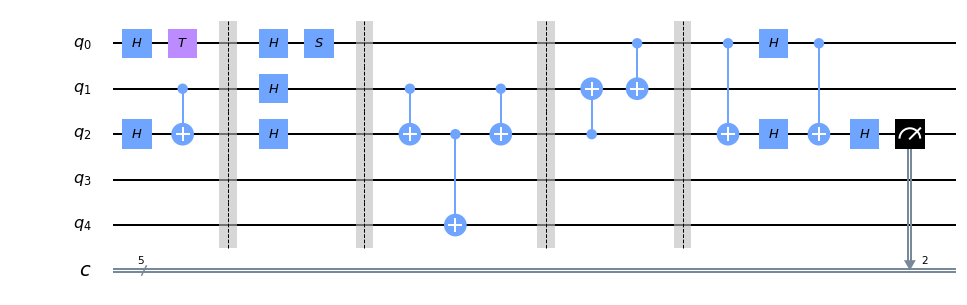

In [19]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister (5, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.t(qr[0])
qc.h(qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()
for i in range (3):
    qc.h(qr[i])
qc.s(qr[0])

qc.barrier()

qc.cx(qr[1],qr[2])
qc.cx(qr[2],qr[4])
qc.cx(qr[1],qr[2])

qc.barrier()
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[1])

qc.barrier()

qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.h(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[2])

qc.measure(qr[2],cr[2])
qc.draw(output='mpl')

simulation: 

 {'00000': 6981, '00100': 1211}


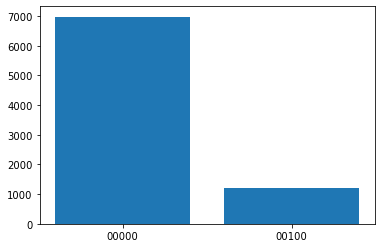

Zero1.0
One0.0


In [20]:
execute_locally(qc)

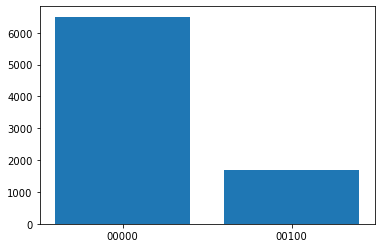

Zero1.0
One0.0


In [21]:
job = execute(qc,backend, shots=8192)
D = job.result().get_counts()
show_results(D)

## Generate Quantum cheque state 

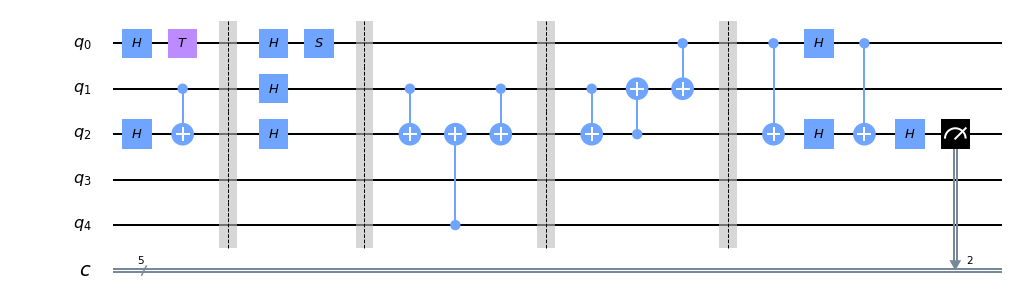

In [22]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister (5, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.t(qr[0])
qc.h(qr[2])
qc.cx(qr[1],qr[2])
qc.barrier()
for i in range (3):
    qc.h(qr[i])
qc.s(qr[0])

qc.barrier()

qc.cx(qr[1],qr[2])
qc.cx(qr[4],qr[2])
qc.cx(qr[1],qr[2])

qc.barrier()
qc.cx(qr[1],qr[2])
qc.cx(qr[2],qr[1])
qc.cx(qr[0],qr[1])

qc.barrier()

qc.cx(qr[0],qr[2])
qc.h(qr[0])
qc.h(qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[2])

qc.measure(qr[2],cr[2])
qc.draw(output='mpl')

simulation: 

 {'00000': 4084, '00100': 4108}


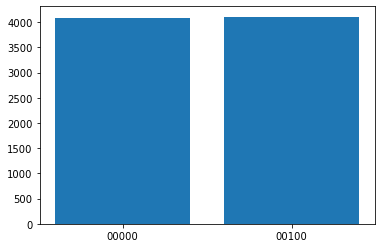

Zero1.0
One0.0


In [23]:
execute_locally(qc)

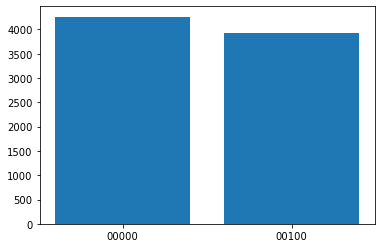

Zero1.0
One0.0


In [24]:
job = execute(qc,backend, shots=8192)
D = job.result().get_counts()
show_results(D)

## Genarate Quantum cheque verification

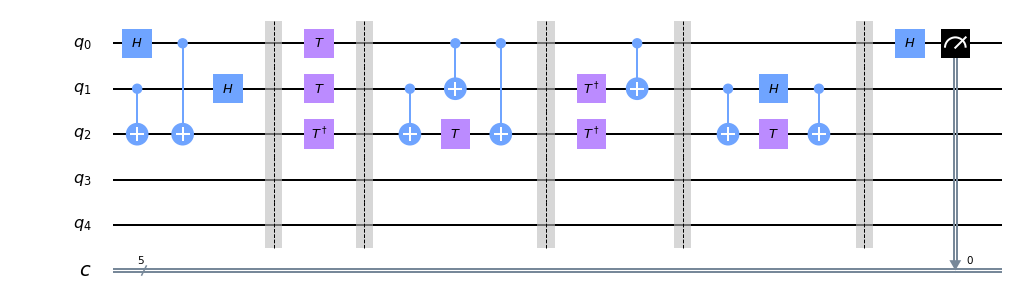

In [25]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister (5, 'c')
qc = QuantumCircuit(qr,cr)

qc.h(qr[0])
qc.cx(qr[1],qr[2])
qc.cx(qr[0],qr[2])
qc.h(qr[1])
qc.barrier()
for i in range(3):
    if (i<2): qc.t(qr[i])
    else: qc.tdg(qr[i])
        
qc.barrier()

qc.cx(qr[1],qr[2])
qc.t(qr[2])
qc.cx(qr[0],qr[1])
qc.cx(qr[0],qr[2])


qc.barrier() 

qc.tdg(qr[1])
qc.tdg(qr[2])
qc.cx(qr[0],qr[1])


qc.barrier()

qc.cx(qr[1],qr[2])
qc.h(qr[1])
qc.t(qr[2])
qc.cx(qr[1],qr[2])

qc.barrier()

qc.h(qr[0])
qc.measure(qr[0],cr[0])
qc.draw(output='mpl')

simulation: 

 {'00000': 8192}


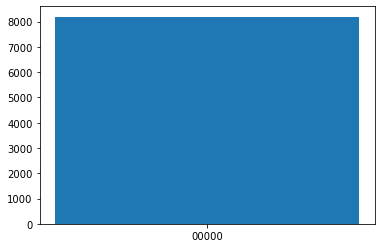

Zero1.0
One0.0


In [26]:
execute_locally(qc)

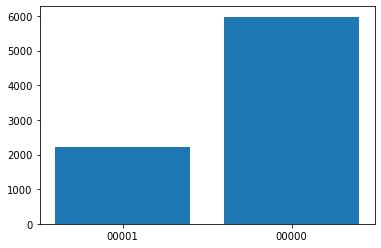

Zero1.0
One0.0


In [27]:
job = execute(qc,backend, shots=8192)
D = job.result().get_counts()
show_results(D)